# Backtesting investment strategies

## Setup

In [1]:
from ml_strategies import random_forest
from quant_strategies import minimum_variance_portfolio
import backtester
import helpers

## Data download

In [2]:
equity_symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "^GSPC"]

equity_returns = helpers.download_equity_returns(equity_symbols, days=365 * 5)
stock_returns = equity_returns.drop('^GSPC', axis=1)
index_returns = equity_returns.loc[:, ['^GSPC']]
sample_split_index = len(equity_returns) // 2

## Stock returns

In [3]:
helpers.display_as_percentage(stock_returns)

,AAPL,MSFT,GOOGL,AMZN,TSLA
2018-11-13,-1.0 %,0.07 %,-0.13 %,-0.35 %,2.25 %
2018-11-14,-2.82 %,-1.42 %,0.63 %,-1.97 %,1.56 %
2018-11-15,2.47 %,2.2 %,1.56 %,1.28 %,1.29 %
2018-11-16,1.11 %,0.94 %,-0.26 %,-1.61 %,1.68 %
2018-11-19,-3.96 %,-3.39 %,-3.82 %,-5.09 %,-0.24 %
...,...,...,...,...,...
2023-11-03,-0.52 %,1.29 %,1.26 %,0.38 %,0.66 %
2023-11-06,1.46 %,1.06 %,0.89 %,0.82 %,-0.31 %
2023-11-07,1.45 %,1.12 %,0.55 %,2.13 %,1.33 %
2023-11-08,0.59 %,0.74 %,0.66 %,-0.44 %,-0.03 %


## Quant strategy example

In [4]:
training_data = stock_returns[:sample_split_index]
test_data = stock_returns[sample_split_index:]

quant_strategy = minimum_variance_portfolio.Strategy()
quant_strategy.train(training_data)
report = backtester.run(quant_strategy, test_data, test_data)

### Portfolio metrics

In [5]:
report.portfolio_metrics()

,Metric
Portfolio return,15.08
Portfolio volatility,31.05
Sharpe ratio,0.32


### Portfolio weights

In [6]:
helpers.display_as_percentage(report.portfolio_weights)

,AAPL,MSFT,GOOGL,AMZN,TSLA
2021-05-17,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
2021-05-18,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
2021-05-19,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
2021-05-20,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
2021-05-21,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
...,...,...,...,...,...
2023-11-03,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
2023-11-06,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
2023-11-07,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %
2023-11-08,5.0 %,8.21 %,44.02 %,37.77 %,5.0 %


### Portfolio returns

#### Table

In [7]:
helpers.display_as_percentage(report.portfolio_returns)

,Minimum Variance portfolio returns
2021-05-17,2.14 %
2021-05-18,0.51 %
2021-05-19,-1.07 %
2021-05-20,0.06 %
2021-05-21,1.3 %
...,...
2023-11-03,1.13 %
2023-11-06,0.81 %
2023-11-07,0.85 %
2023-11-08,1.28 %


#### Graph

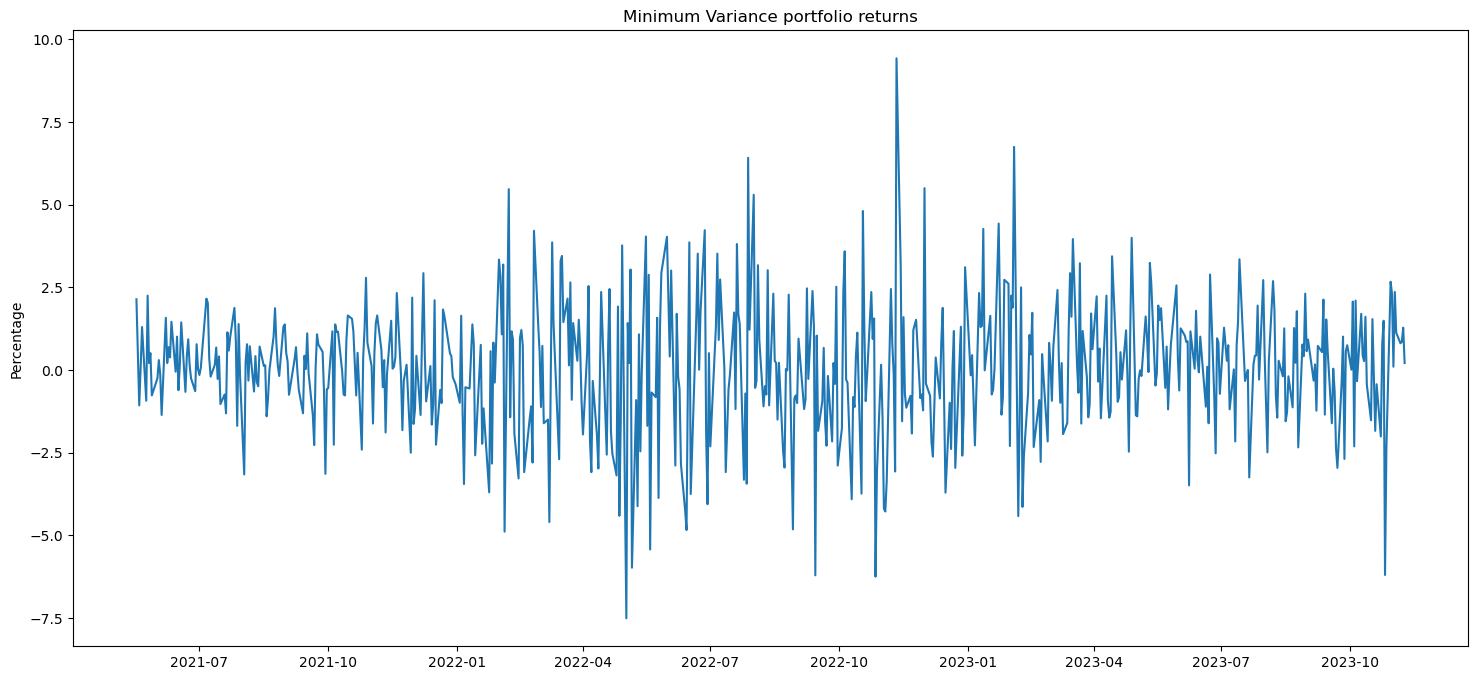

In [8]:
report.plot_portfolio_returns()

### Portfolio value

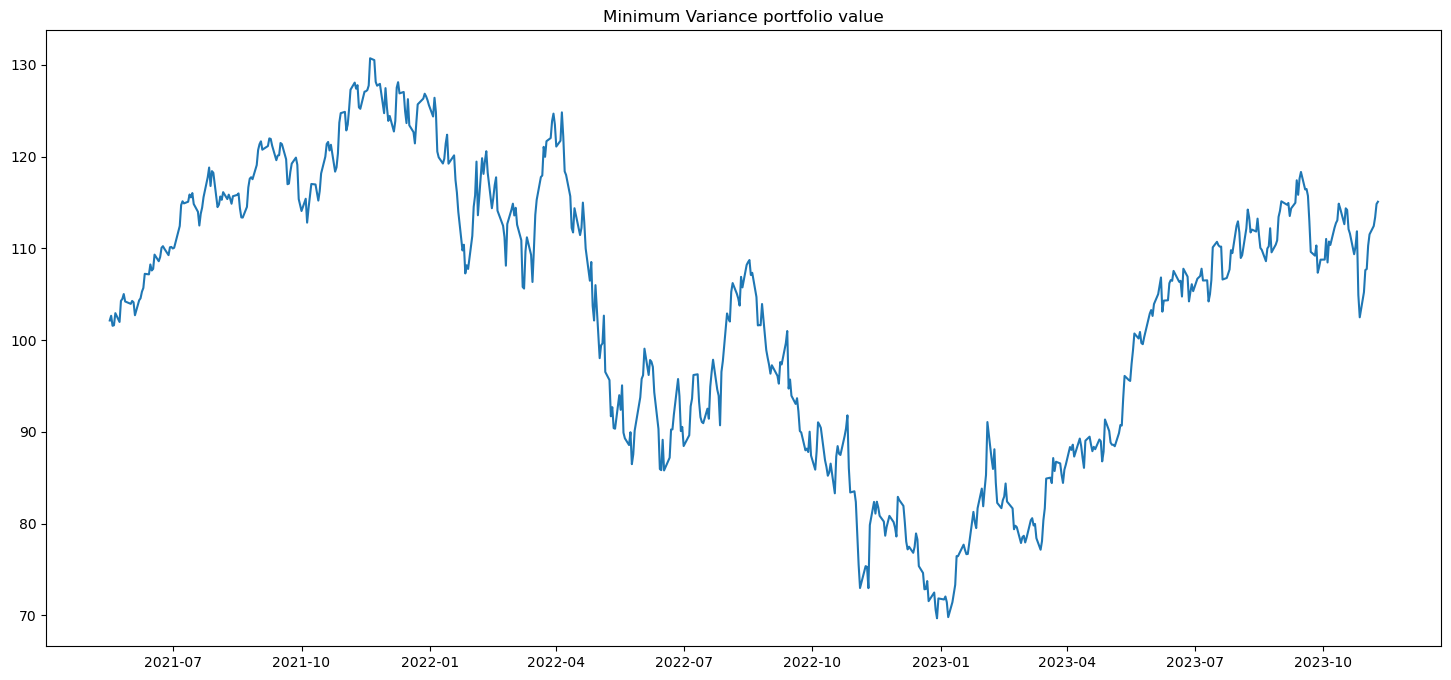

In [9]:
report.plot_portfolio_value()

### Portfolio value breakdown

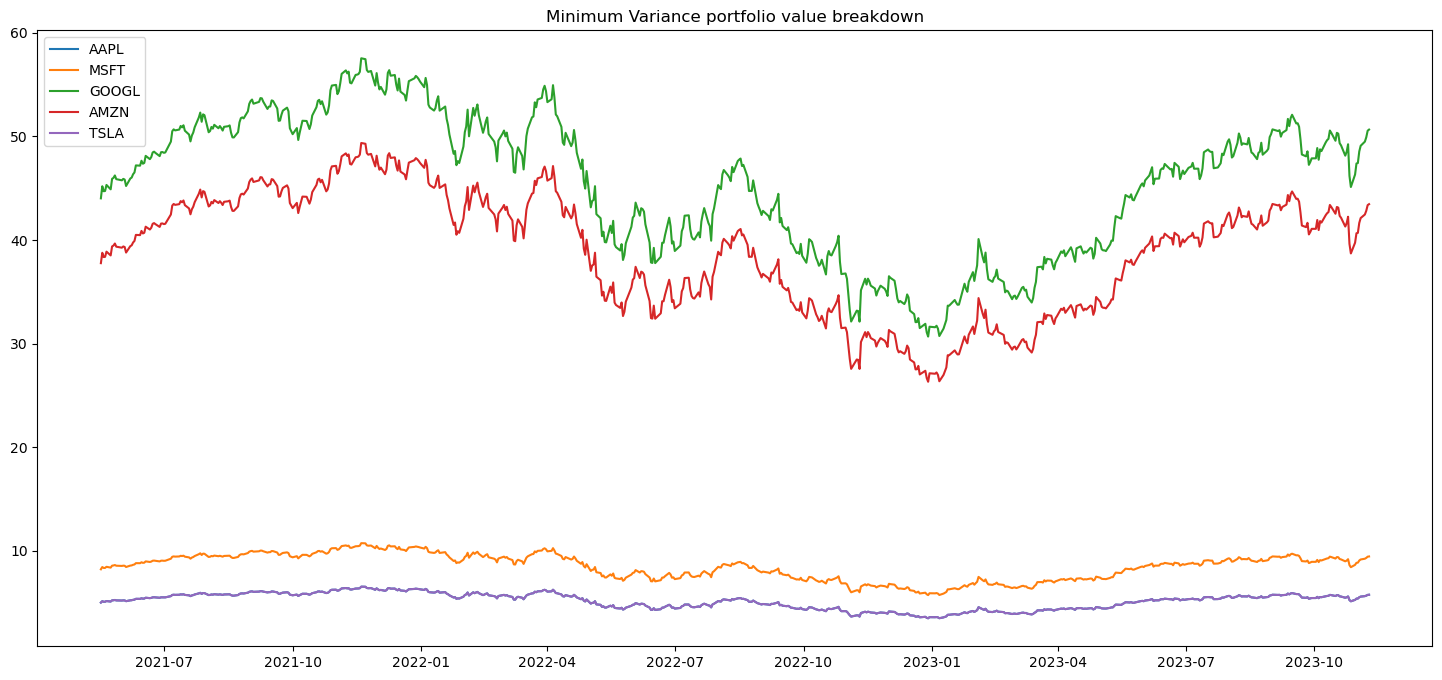

In [10]:
report.plot_portfolio_value_breakdown()

## Machine learning strategy example

In [11]:
y_training_data = stock_returns[:sample_split_index]
X_training_data = index_returns[:sample_split_index]
X_test_data = index_returns[sample_split_index:]
stock_test_data = stock_returns[sample_split_index:]

ml_strategy = random_forest.Strategy()
ml_strategy.train(y=y_training_data, X=X_training_data)
report = backtester.run(ml_strategy, X_test_data, stock_test_data)

### Portfolio metrics

In [12]:
report.portfolio_metrics()

,Metric
Portfolio return,59.15
Portfolio volatility,34.42
Sharpe ratio,1.57


### Portfolio weights

In [13]:
helpers.display_as_percentage(report.portfolio_weights)

,AAPL,MSFT,GOOGL,AMZN,TSLA
2021-05-17,2.76 %,2.76 %,2.76 %,2.76 %,88.96 %
2021-05-18,15.25 %,15.25 %,15.25 %,15.25 %,39.02 %
2021-05-19,15.13 %,15.13 %,17.23 %,18.32 %,34.18 %
2021-05-20,14.78 %,19.22 %,16.47 %,37.23 %,12.3 %
2021-05-21,23.18 %,12.89 %,12.89 %,12.89 %,38.13 %
...,...,...,...,...,...
2023-11-03,20.05 %,26.21 %,18.4 %,21.25 %,14.09 %
2023-11-06,15.67 %,35.52 %,15.67 %,17.46 %,15.67 %
2023-11-07,30.82 %,14.3 %,30.76 %,12.06 %,12.06 %
2023-11-08,4.78 %,14.87 %,70.78 %,4.78 %,4.78 %


### Portfolio returns

#### Table

In [14]:
helpers.display_as_percentage(report.portfolio_returns)

,Random Forest portfolio returns
2021-05-17,3.04 %
2021-05-18,-0.88 %
2021-05-19,-0.65 %
2021-05-20,-0.22 %
2021-05-21,2.51 %
...,...
2023-11-03,1.78 %
2023-11-06,0.74 %
2023-11-07,0.94 %
2023-11-08,0.79 %


#### Graph

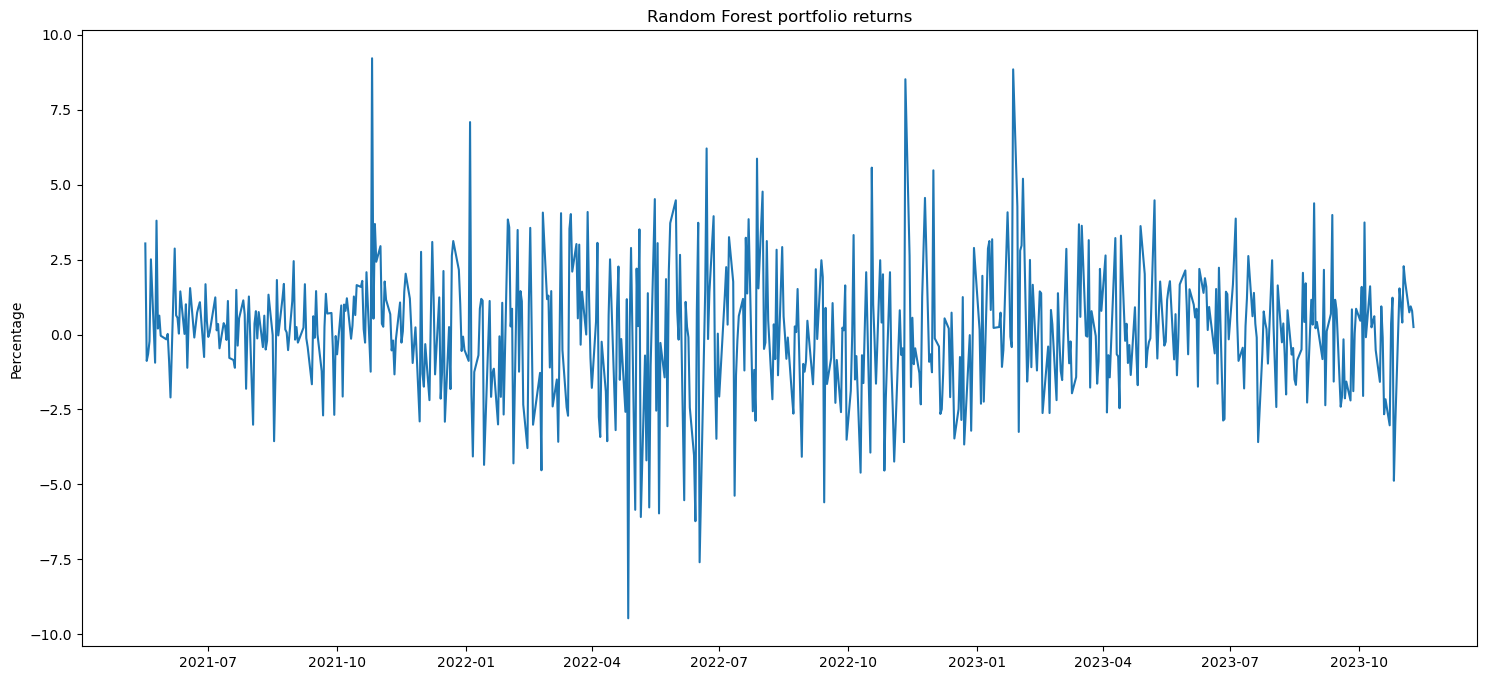

In [15]:
report.plot_portfolio_returns()

### Portfolio value

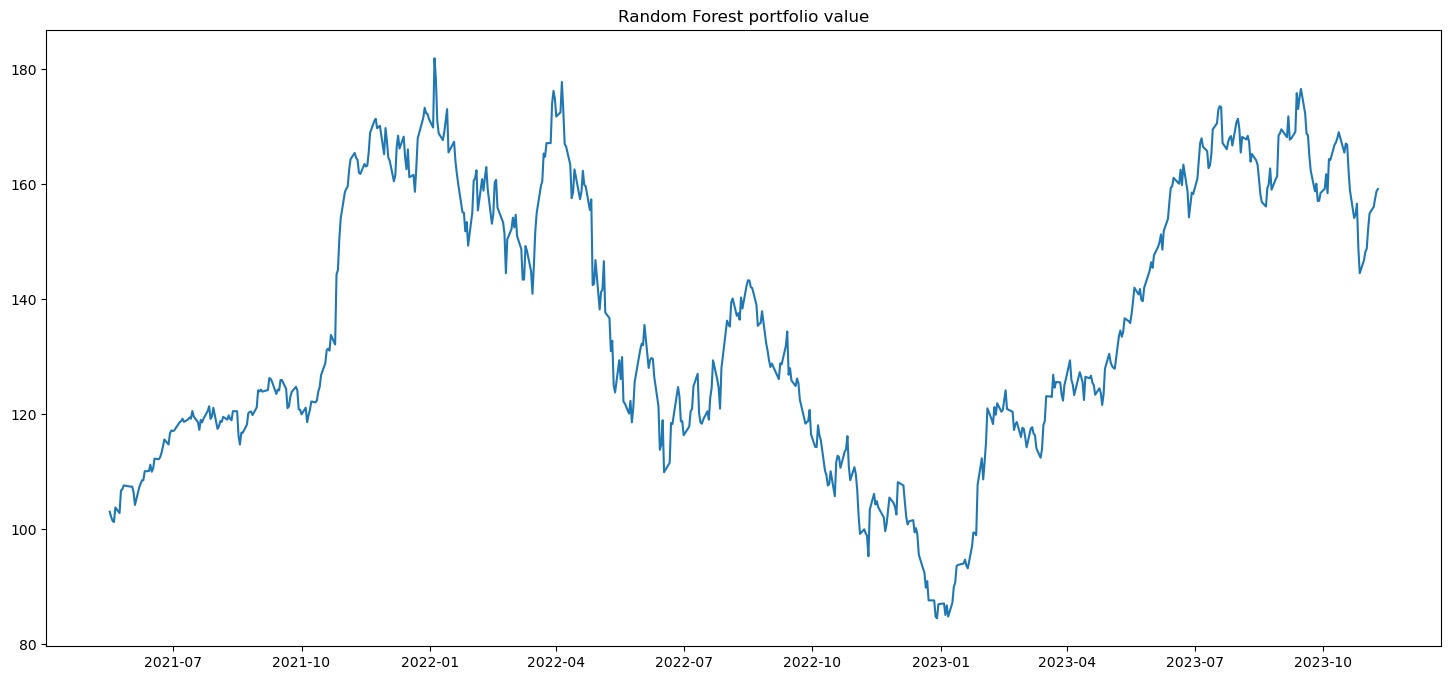

In [16]:
report.plot_portfolio_value()

### Portfolio value breakdown

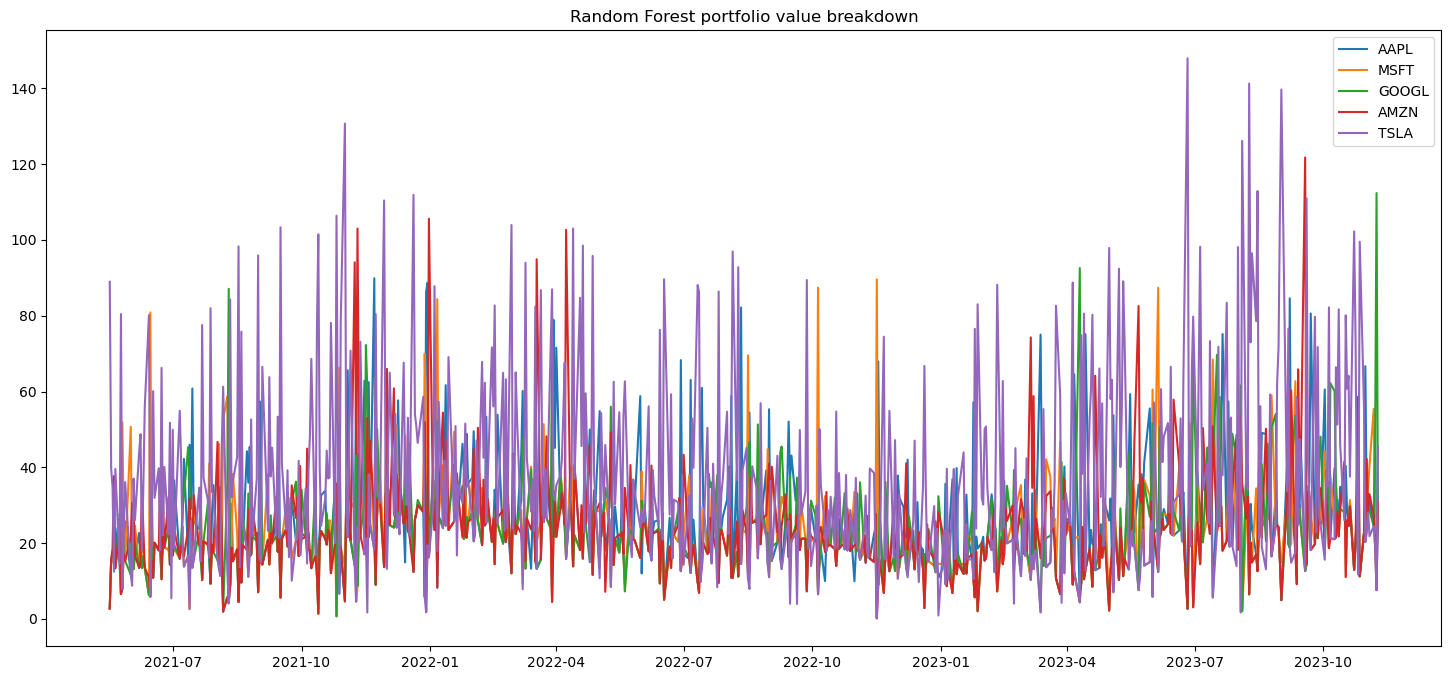

In [17]:
report.plot_portfolio_value_breakdown()